# Task 2: Predict future stock prices

`yfinance` library is already installed in google colab, if was not installed in your system please use `pip install yfinance` to download and install it.

The `yfinance` library has stock market data, we use `MSFT` for Microsoft to download its data of one year duration.

In [1]:
import yfinance as yf
data = yf.download(["MSFT"], period="1y")

/tmp/ipython-input-1112336396.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(["MSFT"], period="1y")
[*********************100%***********************]  1 of 1 completed


# explore the stock data

In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-11-21,409.846649,416.706053,407.285555,416.428104,20780200
2024-11-22,413.946381,414.343445,408.049876,408.357603,24814600
2024-11-25,415.723297,417.996506,411.812146,415.316296,27691100
2024-11-26,424.855927,425.898256,415.782872,416.517444,23458900
2024-11-27,419.892517,424.101489,418.929619,421.996988,18332400


Copy data to a another vairable, collect features

In [4]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
df = data.copy()

# Features
X = df[["Open", "High", "Low", "Volume"]]

# Target: next day's Close
y = df["Close"].shift(-1)

# Remove last row (NaN target)
X = X[:-1]
y = y[:-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 39.10809804752113


In [10]:
last_day = X.iloc[-1].values.reshape(1, -1)
next_close = model.predict(last_day)
print("Predicted next Close:", next_close[0])

Predicted next Close: [487.91621832]


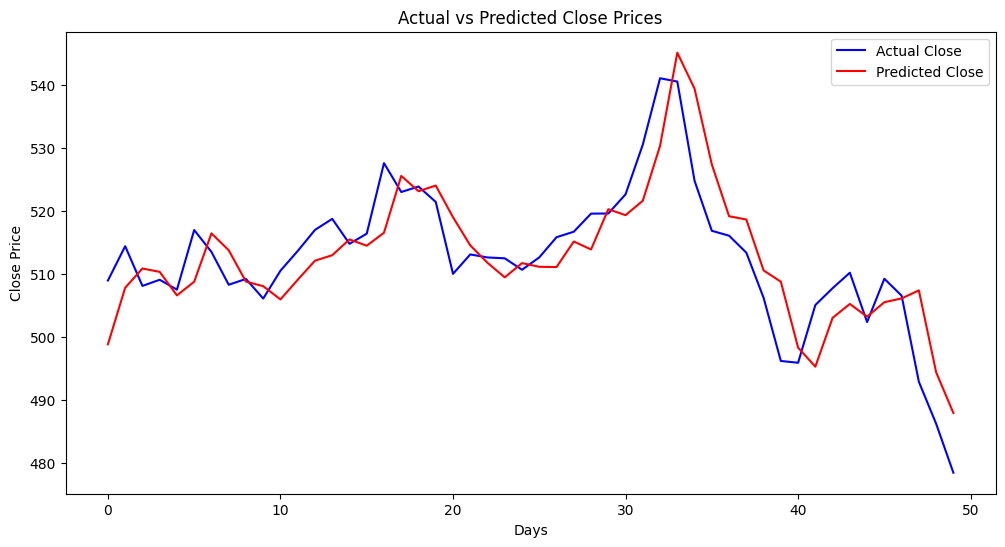

In [11]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Close", color="blue")
plt.plot(y_pred, label="Predicted Close", color="red")
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.show()